In [1]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (13.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving passion.jpeg to passion.jpeg


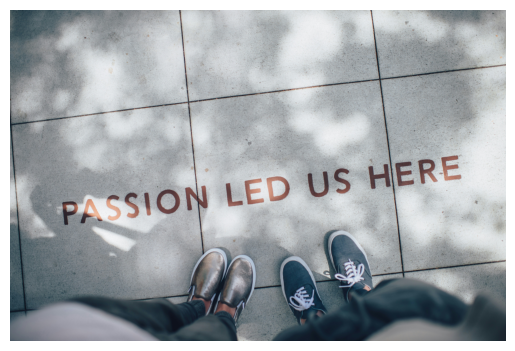

In [4]:
import cv2
from matplotlib import pyplot as plt


image_filename = list(uploaded.keys())[0]


image = cv2.imread(image_filename)


if image is None:
    print("Error: Image not found.")
else:

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

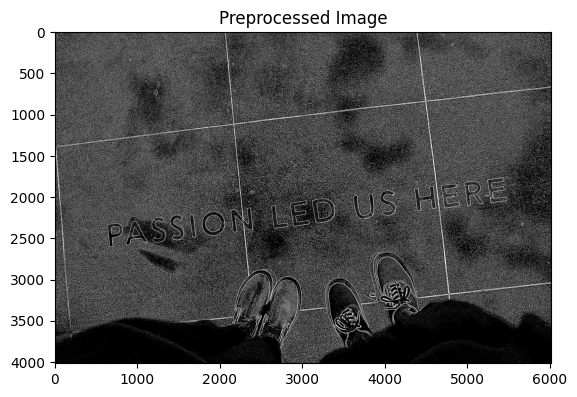

In [5]:
# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)


plt.imshow(thresh, cmap='gray')
plt.title('Preprocessed Image')
plt.show()

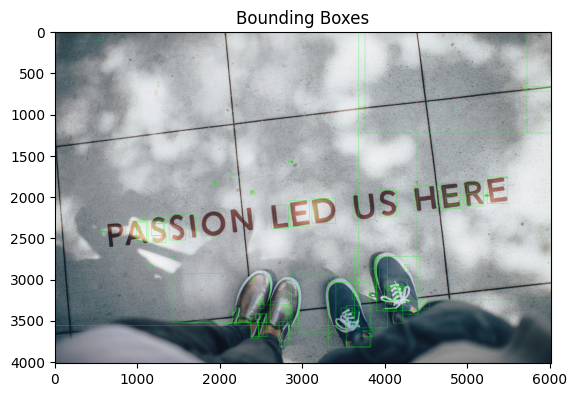

In [6]:
 # 检测文本边界
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


bounding_box_image = image.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if w > 50 and h > 20:
        cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 显示带有边界框的图像
plt.imshow(cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes')
plt.show()

In [7]:
# 使用 Tesseract OCR 提取文本
text = pytesseract.image_to_string(thresh, lang='eng')


print("Extracted Text:")
print(text)

Extracted Text:
Ap
Ee
pareared

tre

= as
Raa

basen:

ask Wee
ENS

ES NARS

Reet
Seay
Site

a

‘i oe

Cans

Eset?
Lt

 



In [8]:
import time

# 测量时间
start_time = time.time()

# 再次运行检测和OCR
text = pytesseract.image_to_string(thresh, lang='eng')

end_time = time.time()
processing_time = end_time - start_time

print(f"Processing Time: {processing_time} seconds")

Processing Time: 343.4171528816223 seconds


In [33]:
#使用EasyOCR提取文本
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.4 MB/s eta 0:00:00


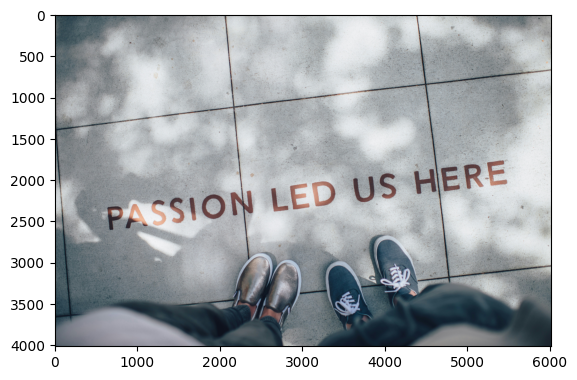

检测到的文本: HIERE (置信度: 0.89)
检测到的文本: US (置信度: 0.97)
检测到的文本: LED (置信度: 1.00)
检测到的文本: PASSION (置信度: 1.00)


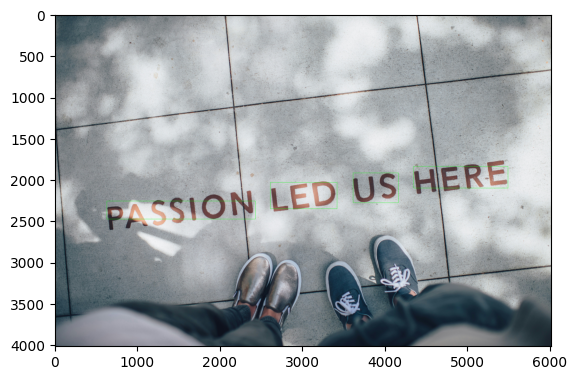

In [35]:
import easyocr
import matplotlib.pyplot as plt
import cv2




image = cv2.imread('passion.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


reader = easyocr.Reader(['en'])  # 'en' 是语言代码，表示英文


results = reader.readtext('passion.jpeg')


for (bbox, text, prob) in results:
    print(f"检测到的文本: {text} (置信度: {prob:.2f})")


    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()